In [8]:
def linestyle_generator():
    linestyle = ['-', '--', '-.', ':']
    lineID = 0
    while True:
        yield linestyle[lineID]
        lineID = (lineID + 1) % len(linestyle)

In [2]:
def plot_set(fig_ax, *args):
    fig_ax.set_xlabel(args[0])
    fig_ax.set_ylabel(args[1])
    fig_ax.grid(ls=':')
    if len(args)==3:
        fig_ax.legend(loc=args[2])

In [3]:
def bodeplot_set(fig_ax, *args):
    
    #　ゲイン線図のグリッドとy軸ラベルの設定
    fig_ax[0].grid(which='both', ls=':')
    fig_ax[0].set_ylabel('Gain [dB]')
    
    # 位相線図のグリッドとx軸、y軸ラベルの設定
    fig_ax[1].grid(which='both', ls=':')
    fig_ax[1].set_xlabel('$\omega$ [rad/s]')
    fig_ax[1].set_ylabel('Phase [deg]')
    
    #凡例の表示
    if len(args) > 0:
        fig_ax[1].legend(loc=args[0])
    if len(args) > 1:
        fig_ax[0].legend(loc=args[1])

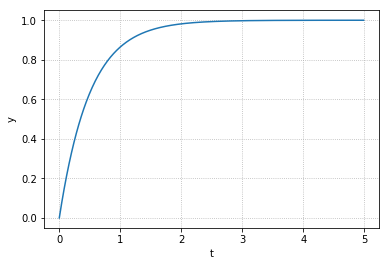

In [5]:
# 一次遅れ系のステップ応答
from control.matlab import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

T, K = 0.5, 1 #時定数とゲインの設定
P = tf([0, K], [T, 1]) #一次遅れ系
y, t = step(P, np.arange(0, 5, 0.01)) #ステップ応答

fig, ax = plt.subplots()
ax.plot(t, y)
plot_set(ax, 't', 'y')


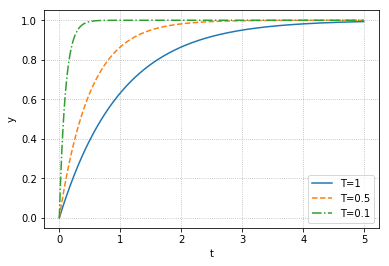

In [11]:
# Tのシステムの影響を確認
fig, ax = plt.subplots()
LS = linestyle_generator()

K = 1
T = [1, 0.5, 0.1]

for i in range(len(T)):
    y, t = step(tf([0, K], [T[i], 1]), np.arange(0, 5, 0.01))
    ax.plot(t, y, ls=next(LS), label='T='+str(T[i]))
    
plot_set(ax, 't', 'y', 'best')

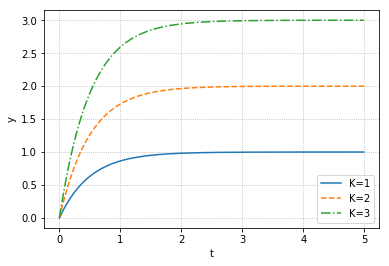

In [14]:
# Kのシステムの影響を確認
fig, ax = plt.subplots()
LS = linestyle_generator()

K = [1, 2, 3]
T = 0.5

for i in range(len(K)):
    y, t = step(tf([0, K[i]], [T, 1]), np.arange(0, 5, 0.01))
    ax.plot(t, y, ls=next(LS), label='K='+str(K[i]))
    
plot_set(ax, 't', 'y', 'best')

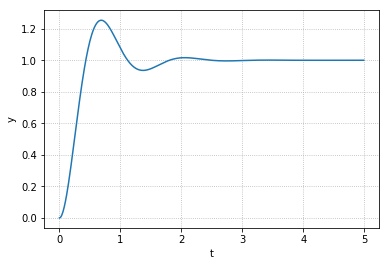

In [15]:
# 2次遅れ系のステップ応答
zeta, omega_n = 0.4, 5 #zeta:減衰係数、omega_n:固有周波数
P = tf([0, omega_n**2], [1, 2*zeta*omega_n, omega_n**2])
y, t = step(P, np.arange(0, 5, 0.01))

fig, ax = plt.subplots()
ax.plot(t, y)
plot_set(ax, 't', 'y')

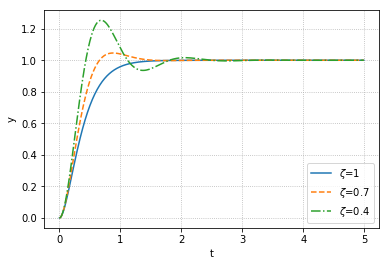

In [16]:
# 減衰係数の影響調査
fig, ax = plt.subplots()
LS = linestyle_generator()

zeta = [1, 0.7, 0.4] #zeta>1の時振動しないで収束
omega_n = 5

for i in range(len(zeta)):
    P = tf([0, omega_n**2], [1, 2*zeta[i]*omega_n, omega_n**2])
    y, t = step(P, np.arange(0, 5, 0.01))
    
    pltargs = {'ls': next(LS)}
    pltargs['label'] = '$\zeta$=' +str(zeta[i])
    ax.plot(t, y, **pltargs)
    
plot_set(ax, 't', 'y', 'best')

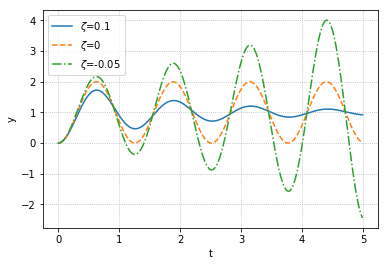

In [17]:
# 減衰係数の影響調査
fig, ax = plt.subplots()
LS = linestyle_generator()

zeta = [0.1, 0, -0.05] #zetaが負のとき発散し、正のときに収束する。
omega_n = 5

for i in range(len(zeta)):
    P = tf([0, omega_n**2], [1, 2*zeta[i]*omega_n, omega_n**2])
    y, t = step(P, np.arange(0, 5, 0.01))
    
    pltargs = {'ls': next(LS)}
    pltargs['label'] = '$\zeta$=' +str(zeta[i])
    ax.plot(t, y, **pltargs)
    
plot_set(ax, 't', 'y', 'best')

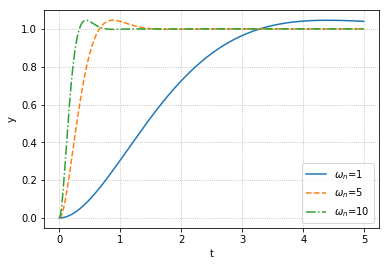

In [19]:
# 固有周波数の影響調査
fig, ax = plt.subplots()
LS = linestyle_generator()

zeta = 0.7
omega_n = [1, 5, 10] #omega_n

for i in range(len(omega_n)):
    P = tf([0, omega_n[i]**2], [1, 2*zeta*omega_n[i], omega_n[i]**2])
    y, t = step(P, np.arange(0, 5, 0.01))
    
    pltargs = {'ls': next(LS)}
    pltargs['label'] = '$\omega_n$=' +str(omega_n[i])
    ax.plot(t, y, **pltargs)
    
plot_set(ax, 't', 'y', 'best')